In [100]:
import pandas as pd
import numpy as np
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [101]:
base_dir = os.path.dirname(os.getcwd())
movies_path = os.path.join(base_dir, 'data', 'Movies_final_ML.csv')
df = pd.read_csv(movies_path)
df.info()
df.head(87000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieId               87585 non-null  int64  
 1   imdbId                87585 non-null  object 
 2   vote_average          86493 non-null  float64
 3   vote_count            86493 non-null  float64
 4   status                86493 non-null  object 
 5   release_date          87455 non-null  object 
 6   revenue               86493 non-null  float64
 7   runtime               86493 non-null  float64
 8   adult                 86493 non-null  object 
 9   backdrop_path         70442 non-null  object 
 10  budget                86493 non-null  float64
 11  homepage              17774 non-null  object 
 12  original_language     86493 non-null  object 
 13  original_title        86493 non-null  object 
 14  overview              85667 non-null  object 
 15  popularity         

,movieId,imdbId,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,original_language,original_title,overview,popularity,poster_path,tagline,production_companies,production_countries,spoken_languages,keywords,title,genres,Directors,Cast,StarActors
0,1,tt0114709,7.971,17152.0,Released,1995-10-30,394400000.0,81.0,False,/3Rfvhy1Nl6sSGJwyjb0QiZzZYlB.jpg,30000000.0,http://toystory.disney.com/toy-story,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",78.404,/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,Hang on for the comedy that goes to infinity a...,Pixar,United States of America,English,"rescue, friendship, mission, martial arts, jea...",Toy Story,"Animation, Adventure, Family, Comedy",John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","Tom Hanks, Tim Allen, Don Rickles"
1,2,tt0113497,7.239,9833.0,Released,1995-12-15,262821940.0,104.0,False,/pYw10zrqfkdm3yD9JTO6vEGQhKy.jpg,65000000.0,http://www.sonypictures.com/movies/jumanji/,en,Jumanji,When siblings Judy and Peter discover an encha...,13.444,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,Roll the dice and unleash the excitement!,"TriStar Pictures, Interscope Communications, T...",United States of America,"English, French","giant insect, board game, disappearance, jungl...",Jumanji,"Adventure, Fantasy, Family",Joe Johnston,"Robin Williams, Kirsten Dunst, Bonnie Hunt, Jo...","Robin Williams, Kirsten Dunst, Bonnie Hunt"
2,3,tt0113228,6.476,347.0,Released,1995-12-22,71500000.0,101.0,False,/1J4Z7VhdAgtdd97nCxY7dcBpjGT.jpg,25000000.0,NaN,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,14.815,/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg,Still Yelling. Still Fighting. Still Ready for...,"Lancaster Gate, Warner Bros. Pictures",United States of America,English,"fishing, sequel, old man, best friend, wedding...",Grumpier Old Men,"Romance, Comedy",Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Walter Matthau, Jack Lemmon, Ann-Margret"
3,4,tt0114885,6.183,142.0,Released,1995-12-22,81452156.0,127.0,False,/jZjoEKXMTDoZAGdkjhAdJaKtXSN.jpg,16000000.0,NaN,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",14.451,/4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg,Friends are the people who let you be yourself...,20th Century Fox,United States of America,English,"based on novel or book, interracial relationsh...",Waiting to Exhale,"Comedy, Drama, Romance",Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...","Whitney Houston, Angela Bassett, Loretta Devine"
4,5,tt0113041,6.228,659.0,Released,1995-12-08,76594107.0,106.0,False,/lEsjVrGU21BeJjF5AF9EWsihDpw.jpg,0.0,NaN,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,14.537,/rj4LBtwQ0uGrpBnCELr716Qo3mw.jpg,Just when his world is back to normal... he's ...,"Touchstone Pictures, Sandollar Productions",United States of America,English,"daughter, baby, parent child relationship, mid...",Father of the Bride Part II,"Comedy, Family",Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Steve Martin, Diane Keaton, Martin Short"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86995,290483,tt0091655,6.417,6.0,Released,1986-07-25,9818377.0,95.0,False,/6nGekkcBL18Sh0RInTzG55lPxsj.jpg,0.0,NaN,cn,扭計雜牌軍,Frequent Jackie Chan cohort Mars stars as Sing...,3.381,/AY9w97SHO1L6A6mCP8zwAh6yzq.jpg,NaN,Paragon Films Ltd.,Hong Kong,Cantonese,NaN,Naughty Boys,"Action, Comedy",Wellson Chin,"Carina Lau, Kara Ying Hung Wai, Mars, Clarence...","Carina Lau, Kara Ying Hung Wai, Mars"
86996,290485,tt26315142,6.286,7.0,Released,2023-09-07,0.0,95.0,False,/ueGDrUAyaA3HyucvixFOkr4nqPD.jpg,0.0,NaN,es,Tótem,Seven year old Sol spends the day at her grand...,18.550,/c7FGI4wXaC2N15snz3W84yAgGf3.jpg,NaN,"Limerencia Films, Paloma Productions, Alpha Vi...","Denmark, France, Mexico",Spanish,NaN,Tótem,Drama,Lila Avilés,"Naíma Sentíes, Montserrat Marañon, Marisol Gas...","Naíma Sentíes, Montserra

In [102]:
def count_zeros_and_empty(df):
    count_dict = {}

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            zero_count = (df[col] == 0).sum()
            count_dict[col] = {'zeros': zero_count}

        elif pd.api.types.is_string_dtype(df[col]):
            empty_count = (df[col] == '').sum()
            count_dict[col] = {'empty_strings': empty_count}

    return count_dict

count_result = count_zeros_and_empty(df)
print(count_result)


{'movieId': {'zeros': 0}, 'imdbId': {'empty_strings': 0}, 'vote_average': {'zeros': 2576}, 'vote_count': {'zeros': 2566}, 'revenue': {'zeros': 73454}, 'runtime': {'zeros': 1262}, 'budget': {'zeros': 71884}, 'popularity': {'zeros': 0}, 'title': {'empty_strings': 0}}


# Transformacja i dopasowanie do ratings

In [103]:
ratings_path = os.path.join(base_dir, 'data', 'ratings_groupped_20pos.parquet')
df_ratings = pd.read_parquet(ratings_path)

In [104]:
# CHECKING movieID coverage

movie_ids_all = set(df['movieId'])

movie_ids_ratings = set(
    m for pos, seen in zip(df_ratings['pos'], df_ratings['seen'])
    for m in list(pos) + list(seen)
)
valid_movie_ids = movie_ids_all & movie_ids_ratings

print(f"Liczba wspólnych movieId: {len(valid_movie_ids)}")

df_ratings['pos'] = df_ratings['pos'].apply(lambda lst: [m for m in lst if m in valid_movie_ids])
df_ratings['seen'] = df_ratings['seen'].apply(lambda lst: [m for m in lst if m in valid_movie_ids])
df_ratings = df_ratings[(df_ratings['pos'].str.len() > 0) | (df_ratings['seen'].str.len() > 0)]

df = df[df['movieId'].isin(valid_movie_ids)]

Liczba wspólnych movieId: 84147


In [105]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84147 entries, 0 to 84146
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieId               84147 non-null  int64  
 1   imdbId                84147 non-null  object 
 2   vote_average          83075 non-null  float64
 3   vote_count            83075 non-null  float64
 4   status                83075 non-null  object 
 5   release_date          84021 non-null  object 
 6   revenue               83075 non-null  float64
 7   runtime               83075 non-null  float64
 8   adult                 83075 non-null  object 
 9   backdrop_path         68254 non-null  object 
 10  budget                83075 non-null  float64
 11  homepage              17493 non-null  object 
 12  original_language     83075 non-null  object 
 13  original_title        83075 non-null  object 
 14  overview              82288 non-null  object 
 15  popularity         

# Początkowe usunięcie niepotrzebnych kolumn

In [106]:
df = df.drop(columns=['adult', 'homepage', 'backdrop_path', 'imdbId', 'poster_path'])
mask_status = ((df['status'] == 'Released') |df['status'].isna() |(df['status'] == ''))
df = (
    df[mask_status]
    .drop(columns=['status'])
    .reset_index(drop=True)
)

In [107]:
print(df.info())

df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84133 entries, 0 to 84132
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieId               84133 non-null  int64  
 1   vote_average          83061 non-null  float64
 2   vote_count            83061 non-null  float64
 3   release_date          84008 non-null  object 
 4   revenue               83061 non-null  float64
 5   runtime               83061 non-null  float64
 6   budget                83061 non-null  float64
 7   original_language     83061 non-null  object 
 8   original_title        83061 non-null  object 
 9   overview              82275 non-null  object 
 10  popularity            83061 non-null  float64
 11  tagline               38082 non-null  object 
 12  production_companies  69943 non-null  object 
 13  production_countries  76714 non-null  object 
 14  spoken_languages      79230 non-null  object 
 15  keywords           

,movieId,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,overview,popularity,tagline,production_companies,production_countries,spoken_languages,keywords,title,genres,Directors,Cast,StarActors
0,1,7.971,17152.0,1995-10-30,394400000.0,81.0,30000000.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",78.404,Hang on for the comedy that goes to infinity a...,Pixar,United States of America,English,"rescue, friendship, mission, martial arts, jea...",Toy Story,"Animation, Adventure, Family, Comedy",John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","Tom Hanks, Tim Allen, Don Rickles"
1,2,7.239,9833.0,1995-12-15,262821940.0,104.0,65000000.0,en,Jumanji,When siblings Judy and Peter discover an encha...,13.444,Roll the dice and unleash the excitement!,"TriStar Pictures, Interscope Communications, T...",United States of America,"English, French","giant insect, board game, disappearance, jungl...",Jumanji,"Adventure, Fantasy, Family",Joe Johnston,"Robin Williams, Kirsten Dunst, Bonnie Hunt, Jo...","Robin Williams, Kirsten Dunst, Bonnie Hunt"
2,3,6.476,347.0,1995-12-22,71500000.0,101.0,25000000.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,14.815,Still Yelling. Still Fighting. Still Ready for...,"Lancaster Gate, Warner Bros. Pictures",United States of America,English,"fishing, sequel, old man, best friend, wedding...",Grumpier Old Men,"Romance, Comedy",Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Walter Matthau, Jack Lemmon, Ann-Margret"


# Inzynieria cech

In [108]:
# IMDB WEIGHTED AVERAGE

C = df['vote_average'].mean()
m = 304 # TOP 10 %
# m = 99 # TOP 20 %

def weighted_rating(row, m=m, C=C):
    v = row['vote_count']
    R = row['vote_average']
    return (R * v + C * m) / (v + m) if v > 0 else 0

df['vote_score'] = df.apply(weighted_rating, axis=1)

In [109]:
# BLOCKBUSTER

budget_threshold = df['revenue'].quantile(0.95)
popularity_threshold = df['popularity'].quantile(0.90)
vote_score_threshold = df['vote_score'].quantile(0.90)

df['if_blockbuster'] = np.where(
    (df['vote_score'] >= vote_score_threshold) &
    (df['revenue'] >= budget_threshold) &
    (df['popularity'] >= popularity_threshold),
    1,
    0
)

print(df[['title', 'revenue', 'popularity', 'vote_score', 'if_blockbuster']].head())


                         title      revenue  popularity  vote_score  \
0                    Toy Story  394400000.0      78.404    7.934719   
1                      Jumanji  262821940.0      13.444    7.198476   
2             Grumpier Old Men   71500000.0      14.815    6.201282   
3            Waiting to Exhale   81452156.0      14.451    5.981723   
4  Father of the Bride Part II   76594107.0      14.537    6.120576   

   if_blockbuster  
0               1  
1               1  
2               0  
3               0  
4               0  


In [110]:
# HIGHLY WATCHED

df['highly_watched'] = np.where(
    ((df['popularity'] >= popularity_threshold) & (df['vote_count'] >= df['vote_count'].quantile(0.80))),
    1,
    0
)

print(df[['title', 'budget', 'popularity', 'vote_count', 'vote_score', 'if_blockbuster', 'highly_watched']].head())

                         title      budget  popularity  vote_count  \
0                    Toy Story  30000000.0      78.404     17152.0   
1                      Jumanji  65000000.0      13.444      9833.0   
2             Grumpier Old Men  25000000.0      14.815       347.0   
3            Waiting to Exhale  16000000.0      14.451       142.0   
4  Father of the Bride Part II         0.0      14.537       659.0   

   vote_score  if_blockbuster  highly_watched  
0    7.934719               1               1  
1    7.198476               1               1  
2    6.201282               0               1  
3    5.981723               0               1  
4    6.120576               0               1  


In [111]:
# YEAR AND DECADES

df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# BECAUSE WE HAVE 9 MOVIES <1890 WE CHANGE THEIR YEAR TO 1890
df.loc[df['release_year'] < 1890, 'release_year'] = 1890
df['decade'] = pd.cut(df['release_year'], bins=range(1890, 2031, 10), right=False)

In [112]:
# HIGHLY RATED WITH DIVISION ON DECADES

vote_score_thresholds = df.groupby('decade')['vote_score'].quantile(0.90)

def is_highly_rated(row):
    decade = row['decade']
    score = row['vote_score']
    count = row['vote_count']

    if pd.isna(decade) or pd.isna(score) or pd.isna(count):
        return 0

    threshold = vote_score_thresholds.get(decade, np.inf)

    # To block low_voted movies
    if count >= 50 and score >= threshold:
        return 1
    return 0

df['highly_rated'] = df.apply(is_highly_rated, axis=1)

C:\Users\matimathew\AppData\Local\Temp\ipykernel_14820\2878591845.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vote_score_thresholds = df.groupby('decade')['vote_score'].quantile(0.90)


In [113]:
# COMBINING VOTE_SCORE AND POPULARITY
# from sklearn.preprocessing import MinMaxScaler
#
# scaler = MinMaxScaler()
# df[['scaled_votes', 'scaled_popularity']] = scaler.fit_transform(df[['vote_count', 'popularity']])
#
# df['engagement_score'] = 0.6 * df['scaled_votes'] + 0.4 * df['scaled_popularity']

from sklearn.preprocessing import QuantileTransformer

quantile = QuantileTransformer(output_distribution='normal', random_state=42, n_quantiles=1000)

df[['scaled_votes', 'scaled_popularity']] = quantile.fit_transform(df[['vote_count', 'popularity']])

df['engagement_score'] = 0.6 * df['scaled_votes'] + 0.4 * df['scaled_popularity']

df['engagement_score'] = df['engagement_score'].fillna(0.0) # TO BE ABLE TO COUNT SCORES FOR MOVIES WITH 0 engagement_score


In [114]:
# WE GET ENGLISH STOPWORDS
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matimathew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [115]:
# SEMANTIC_KEYWORDS (MERGE OF TAGLINE + KEYWORDS)

import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_and_tokenize_tagline(tagline):
    if pd.isna(tagline):
        return []
    words = re.sub(r'[^\w\s]', '', tagline.lower()).split()
    filtered = [w for w in words if w not in stop_words]
    return filtered

def combine_keywords_and_tagline(row):
    kw = row['keywords'] if pd.notna(row['keywords']) else ''
    tag_tokens = clean_and_tokenize_tagline(row['tagline'])
    kw_tokens = [k.strip().lower() for k in kw.split(',') if k]
    combined = kw_tokens + tag_tokens
    return list(set(combined))

df['semantic_keywords'] = df.apply(combine_keywords_and_tagline, axis=1)

In [116]:
# CAST IMPORTANCE AND TOP ACTORS

from collections import defaultdict

df['Cast'] = df['Cast'].fillna("").apply(lambda x: x.split(', ') if isinstance(x, str) else [])
df['Cast'] = df['Cast'].apply(lambda x: [] if x == [''] else x)

actor_engagement = defaultdict(list)

for _, row in df.iterrows():
    cast = row['Cast']
    engagement = row.get('engagement_score', np.nan)
    if not isinstance(cast, list) or pd.isna(engagement):
        continue
    for actor in cast:
        actor_engagement[actor].append(engagement)

actor_score = {
    actor: np.mean(scores) * np.log1p(len(scores))
    for actor, scores in actor_engagement.items()
}

# TO DEFINE PARAMETERS (SEEMS TO HAVE BEST RESULTS WITH 5)
TOP_N = 5
MAX_CAST_LEN = df['Cast'].apply(len).max()

def compute_cast_importance_with_names(cast):
    if not cast or len(cast) == 0:
        return pd.Series([0.0, []])
    scores = sorted([(actor, actor_score.get(actor, 0)) for actor in cast], key=lambda x: x[1], reverse=True)
    top_scores = scores[:TOP_N]
    mean_score = np.mean([s[1] for s in top_scores]) if top_scores else 0.0
    weight = len(top_scores) / MAX_CAST_LEN if MAX_CAST_LEN > 0 else 1.0
    importance = mean_score * weight
    top_actors = [s[0] for s in top_scores]
    return pd.Series([importance, top_actors])

df[['cast_importance', 'top_cast_members']] = df['Cast'].apply(compute_cast_importance_with_names)

In [117]:
df.tail(1000)

,movieId,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,overview,popularity,tagline,production_companies,production_countries,spoken_languages,keywords,title,genres,Directors,Cast,StarActors,vote_score,if_blockbuster,highly_watched,release_year,decade,highly_rated,scaled_votes,scaled_popularity,engagement_score,semantic_keywords,cast_importance,top_cast_members
83133,289011,6.4,16.0,2008-04-16,0.0,30.0,15.0,en,What Is Brazil?,What is this film called Brazil? Find out in t...,1.979,NaN,NaN,NaN,English,behind the scenes,What Is Brazil?,Documentary,NaN,[],NaN,5.913320,0,0,2008.0,"[2000, 2010)",0,-0.168912,-0.464555,-0.287169,[behind the scenes],0.000000,[]
83134,289015,7.5,4.0,1959-06-12,0.0,115.0,0.0,el,Έγκλημα στο Κολωνάκι,When the painter Nasos Karnezis is found dead ...,0.607,NaN,Tzal Film,Greece,Greek,NaN,Crime in Kolonaki,"Mystery, Crime, Thriller",Jannis Aliferis,"[Michalis Nikolinakos, Gely Mavropoulou, Andre...","Michalis Nikolinakos, Gely Mavropoulou, Andrea...",5.908644,0,0,1959.0,"[1950, 1960)",0,-1.097845,-1.667658,-1.325770,[],-0.423928,"[Gely Mavropoulou, Andreas Barkoulis, Nasos Ke..."
83135,289019,4.8,6.0,1980-08-08,0.0,93.0,0.0,es,Traficantes de pánico,A band of thugs belonging to an organized crim...,1.205,NaN,"Herald Films, Lotus Films, Productora Fílmica ...","Spain, Italy, Mexico",English,"airplane, kidnapping, hostage, hostage-taking",Under Siege,"Action, Thriller",René Cardona Jr.,"[Stuart Whitman, Antonella Interlenghi, Marisa...","Stuart Whitman, Antonella Interlenghi, Marisa ...",5.866653,0,0,1980.0,"[1980, 1990)",0,-0.837338,-1.007252,-0.905304,"[kidnapping, hostage-taking, hostage, airplane]",0.191644,"[Hugo Stiglitz, Sonia Viviani, Antonella Inter..."
83136,289021,6.8,217.0,2023-07-26,91000000.0,123.0,157800000.0,en,Haunted Mansion,A woman and her son enlist a motley crew of so...,86.751,Home is where the haunt is.,"Walt Disney Pictures, Rideback",United States of America,English,"magic, haunted house, grief, ghost, taunting, ...",Haunted Mansion,"Fantasy, Comedy",Justin Simien,"[LaKeith Stanfield, Rosario Dawson, Owen Wilso...","LaKeith Stanfield, Rosario Dawson, Owen Wilson",6.267682,1,1,2023.0,"[2020, 2030)",0,1.124632,2.685472,1.748968,"[based on theme park ride, taunting, ridiculou...",2.541115,"[Owen Wilson, Jared Leto, Danny DeVito, Rosari..."
83137,289025,7.0,3.0,2023-07-20,0.0,97.0,0.0,en,Deadly DILF,A harmless flirtation between a college freshm...,9.012,NaN,"MarVista Entertainment, Penalty Vox, Tubi TV",United States of America,English,NaN,Deadly DILF,"Thriller, Drama",Dylan Vox,"[Curtis Hamilton, Sofia Bryant, Naomi Walley, ...","Curtis Hamilton, Sofia Bryant, Naomi Walley",5.898574,0,0,2023.0,"[2020, 2030)",0,-1.269664,0.899499,-0.401999,[],-0.010780,"[Jeryl Prescott, Sofia Bryant, Jana Lee Hambli..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84128,292709,7.1,14.0,2017-03-16,0.0,97.0,0.0,de,Zwischen den Jahren,Becker is a German ex-con trying to hold down ...,2.299,NaN,"Radical Movies Production, ARTE, WDR, ARD",Germany,German,NaN,End of the Season,Drama,Lars Henning,"[Peter Kurth, Karl Markovics, Catrin Striebeck...","Peter Kurth, Karl Markovics, Catrin Striebeck",5.941077,0,0,2017.0,"[2010, 2020)",0,-0.263985,-0.307578,-0.281422,[],0.078606,"[Karl Markovics, Peter Kurth, Catrin Striebeck..."
84129,292731,0.0,0.0,2022-10-06,0.0,92.0,0.0,es,El caso Monroy,Ronnie Monroy has had an unmeaningful life as ...,1.400,NaN,"Chullachaki Producciones, Gema Films","Argentina, Peru",Spanish,NaN,The Monroy Affaire,Drama,Josué Méndez,"[Damián Alcázar, Lia Camilo, Maryloly López, S...","Damián Alcázar, Lia Camilo, Maryloly López",0.000000,0,0,2022.0,"[2020, 2030)",0,-5.199338,-0.839121,-3.455251,[],-0.769019,"[Damián Alcázar, Martin Martinez, Liliana Truj..."
84130,292753,0.0,0.0,2023-09-01,0.0,107.0,0.0,fa,Orca,"Elham is a young, divorced Iranian woman. Seek...",1.

In [118]:
# DIRECTORS SCORE AND BEST DIRECTORS

df['Directors'] = df['Directors'].fillna("").apply(lambda x: x.split(', ') if isinstance(x, str) else [])
df['Directors'] = df['Directors'].apply(lambda x: [] if x == [''] else x)

director_engagement_sum = defaultdict(float)
director_film_count = defaultdict(int)

for idx, row in df.iterrows():
    engagement = row['engagement_score']
    for director in row['Directors']:
        director_engagement_sum[director] += engagement
        director_film_count[director] += 1

director_score = {
    director: total_engagement / np.log1p(director_film_count[director])
    for director, total_engagement in director_engagement_sum.items()
}

# TO DEFINE PARAMETERS (SEEMS TO HAVE BEST RESULTS WITH 3)
TOP_N_DIRECTORS = 3

def compute_director_importance_with_names(directors):
    if not directors or len(directors) == 0:
        return pd.Series([0.0, []])
    scores = sorted([(d, director_score.get(d, 0)) for d in directors], key=lambda x: x[1], reverse=True)
    top_scores = scores[:TOP_N_DIRECTORS]
    mean_score = np.mean([s[1] for s in top_scores]) if top_scores else 0.0
    return pd.Series([mean_score, [s[0] for s in top_scores]])

df[['director_score', 'top_directors']] = df['Directors'].apply(compute_director_importance_with_names)

In [119]:
df.head(1000)

,movieId,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,overview,popularity,tagline,production_companies,production_countries,spoken_languages,keywords,title,genres,Directors,Cast,StarActors,vote_score,if_blockbuster,highly_watched,release_year,decade,highly_rated,scaled_votes,scaled_popularity,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors
0,1,7.971,17152.0,1995-10-30,394400000.0,81.0,30000000.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",78.404,Hang on for the comedy that goes to infinity a...,Pixar,United States of America,English,"rescue, friendship, mission, martial arts, jea...",Toy Story,"Animation, Adventure, Family, Comedy",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","Tom Hanks, Tim Allen, Don Rickles",7.934719,1,1,1995.0,"[1990, 2000)",1,3.125297,2.627174,2.926048,"[computer animation, walkie talkie, elementary...",2.173657,"[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...",7.633747,[John Lasseter]
1,2,7.239,9833.0,1995-12-15,262821940.0,104.0,65000000.0,en,Jumanji,When siblings Judy and Peter discover an encha...,13.444,Roll the dice and unleash the excitement!,"TriStar Pictures, Interscope Communications, T...",United States of America,"English, French","giant insect, board game, disappearance, jungl...",Jumanji,"Adventure, Fantasy, Family",[Joe Johnston],"[Robin Williams, Kirsten Dunst, Bonnie Hunt, J...","Robin Williams, Kirsten Dunst, Bonnie Hunt",7.198476,1,1,1995.0,"[1990, 2000)",1,2.721575,1.250898,2.133304,"[based on young adult novel, disappearance, di...",2.150932,"[Robin Williams, Kirsten Dunst, Bonnie Hunt, P...",7.394196,[Joe Johnston]
2,3,6.476,347.0,1995-12-22,71500000.0,101.0,25000000.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,14.815,Still Yelling. Still Fighting. Still Ready for...,"Lancaster Gate, Warner Bros. Pictures",United States of America,English,"fishing, sequel, old man, best friend, wedding...",Grumpier Old Men,"Romance, Comedy",[Howard Deutch],"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","Walter Matthau, Jack Lemmon, Ann-Margret",6.201282,0,1,1995.0,"[1990, 2000)",0,1.299539,1.354857,1.321666,"[wedding, pranks, italian restaurant, yelling,...",1.149017,"[Kevin Pollak, Daryl Hannah, Jack Lemmon, Soph...",4.730674,[Howard Deutch]
3,4,6.183,142.0,1995-12-22,81452156.0,127.0,16000000.0,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",14.451,Friends are the people who let you be yourself...,20th Century Fox,United States of America,English,"based on novel or book, interracial relationsh...",Waiting to Exhale,"Comedy, Drama, Romance",[Forest Whitaker],"[Whitney Houston, Angela Bassett, Loretta Devi...","Whitney Houston, Angela Bassett, Loretta Devine",5.981723,0,1,1995.0,"[1990, 2000)",0,0.975466,1.335974,1.119669,"[forget, let, friends, based on novel or book,...",1.584446,"[Dennis Haysbert, Angela Bassett, Mykelti Will...",2.185964,[Forest Whitaker]
4,5,6.228,659.0,1995-12-08,76594107.0,106.0,0.0,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,14.537,Just when his world is back to normal... he's ...,"Touchstone Pictures, Sandollar Productions",United States of America,English,"daughter, baby, parent child relationship, mid...",Father of the Bride Part II,"Comedy, Family",[Charles Shyer],"[Steve Martin, Diane Keaton, Martin Short, Kim...","Steve Martin, Diane Keaton, Martin Short",6.120576,0,1,1995.0,"[1990, 2000)",0,1.523878,1.340199,1.450406,"[baby, pregnancy, gynecologist, remake, normal...",2.047952,"[Steve Martin, BD Wong, Martin Short, Diane Ke...",4.217088,[Charles Shyer]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1018,6.606,150.0,1965-12-02,0.0,112.0,0.0,en,That Darn Cat!,A young woman suspects foul play when her cat ...,7.756,It takes a Siamese secret

In [120]:
# DODANIE FLAG DLA ROZROZNIENIA DANYCH

df['has_keywords'] = df['keywords'].apply(lambda x: int(isinstance(x, str) and x.strip() != ''))
df['has_cast'] = df['Cast'].apply(lambda x: int(isinstance(x, list) and len(x) > 0))
df['has_director'] = df['Directors'].apply(lambda x: int(isinstance(x, list) and len(x) > 0))

print(df[['has_keywords', 'has_director', 'has_cast']].sum())

has_keywords    57440
has_director    75364
has_cast        75364
dtype: int64


In [121]:
columns_to_drop = [
    'revenue',
    'budget',
    'vote_count',
    'vote_average',
    'production_companies',
    'production_countries',
    'original_language',
    'scaled_votes',
    'scaled_popularity',
    'StarActors',
    'spoken_languages',
    'original_title',
    'release_date',
    'tagline',
    'Cast',
    'vote_score',
    'keywords',
    'popularity',
    'Directors'
]

df_cleaned = df.drop(columns=columns_to_drop)
df = df_cleaned

print(df_cleaned.info())

count_result = count_zeros_and_empty(df)
print(count_result)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84133 entries, 0 to 84132
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   movieId            84133 non-null  int64   
 1   runtime            83061 non-null  float64 
 2   overview           82275 non-null  object  
 3   title              84133 non-null  object  
 4   genres             82604 non-null  object  
 5   if_blockbuster     84133 non-null  int32   
 6   highly_watched     84133 non-null  int32   
 7   release_year       83004 non-null  float64 
 8   decade             83004 non-null  category
 9   highly_rated       84133 non-null  int64   
 10  engagement_score   84133 non-null  float64 
 11  semantic_keywords  84133 non-null  object  
 12  cast_importance    84133 non-null  float64 
 13  top_cast_members   84133 non-null  object  
 14  director_score     84133 non-null  float64 
 15  top_directors      84133 non-null  object  
 16  has_

In [122]:
df.head(87000)

,movieId,runtime,overview,title,genres,if_blockbuster,highly_watched,release_year,decade,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,has_keywords,has_cast,has_director
0,1,81.0,"Led by Woody, Andy's toys live happily in his ...",Toy Story,"Animation, Adventure, Family, Comedy",1,1,1995.0,"[1990, 2000)",1,2.926048,"[computer animation, walkie talkie, elementary...",2.173657,"[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...",7.633747,[John Lasseter],1,1,1
1,2,104.0,When siblings Judy and Peter discover an encha...,Jumanji,"Adventure, Fantasy, Family",1,1,1995.0,"[1990, 2000)",1,2.133304,"[based on young adult novel, disappearance, di...",2.150932,"[Robin Williams, Kirsten Dunst, Bonnie Hunt, P...",7.394196,[Joe Johnston],1,1,1
2,3,101.0,A family wedding reignites the ancient feud be...,Grumpier Old Men,"Romance, Comedy",0,1,1995.0,"[1990, 2000)",0,1.321666,"[wedding, pranks, italian restaurant, yelling,...",1.149017,"[Kevin Pollak, Daryl Hannah, Jack Lemmon, Soph...",4.730674,[Howard Deutch],1,1,1
3,4,127.0,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,"Comedy, Drama, Romance",0,1,1995.0,"[1990, 2000)",0,1.119669,"[forget, let, friends, based on novel or book,...",1.584446,"[Dennis Haysbert, Angela Bassett, Mykelti Will...",2.185964,[Forest Whitaker],1,1,1
4,5,106.0,Just when George Banks has recovered from his ...,Father of the Bride Part II,"Comedy, Family",0,1,1995.0,"[1990, 2000)",0,1.450406,"[baby, pregnancy, gynecologist, remake, normal...",2.047952,"[Steve Martin, BD Wong, Martin Short, Diane Ke...",4.217088,[Charles Shyer],1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84128,292709,97.0,Becker is a German ex-con trying to hold down ...,End of the Season,Drama,0,0,2017.0,"[2010, 2020)",0,-0.281422,[],0.078606,"[Karl Markovics, Peter Kurth, Catrin Striebeck...",-0.406006,[Lars Henning],0,1,1
84129,292731,92.0,Ronnie Monroy has had an unmeaningful life as ...,The Monroy Affaire,Drama,0,0,2022.0,"[2020, 2030)",0,-3.455251,[],-0.769019,"[Damián Alcázar, Martin Martinez, Liliana Truj...",-3.072785,[Josué Méndez],0,1,1
84130,292753,107.0,"Elham is a young, divorced Iranian woman. Seek...",Orca,Drama,0,0,2023.0,"[2020, 2030)",0,-3.464984,"[life, freedom]",-1.147724,"[Taraneh Alidoosti, Ayoub Afshar, Arash Aghabe...",-4.998915,[Sahar Mosayebi],0,1,1
84131,292755,94.0,"In Vietnam, aspiring actor Johnny Taylor is gi...",The Angry Breed,Drama,0,0,1968.0,"[1960, 1970)",0,-1.246550,[],0.028521,"[Jan Sterling, Lori Martin, James MacArthur, W...",-1.798392,[David Commons],0,1,1


# Lematyzacja i czyszczenie danych opisowych

In [123]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matimathew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matimathew\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [124]:
# LEMANIZER IN ORDER TO ACHIVE SIMILARITIES AS ONE WORDS (books != book) => (book = book)

import ast

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_keywords_phrases(keywords):
    if isinstance(keywords, str):
        try:
            keywords = ast.literal_eval(keywords)
        except:
            return []
    if not isinstance(keywords, list):
        return []

    result = []
    for phrase in keywords:
        phrase = phrase.lower()
        if phrase in stop_words:
            continue
        lemmatized = " ".join([
            lemmatizer.lemmatize(word)
            for word in phrase.split()
            if word not in stop_words
        ])
        if lemmatized:
            result.append(lemmatized)
    return result

df["lemmatized_keywords"] = df["semantic_keywords"].apply(lemmatize_keywords_phrases)

print(df[["semantic_keywords", "lemmatized_keywords"]].head(10))

                                   semantic_keywords  \
0  [computer animation, walkie talkie, elementary...   
1  [based on young adult novel, disappearance, di...   
2  [wedding, pranks, italian restaurant, yelling,...   
3  [forget, let, friends, based on novel or book,...   
4  [baby, pregnancy, gynecologist, remake, normal...   
5  [honor, bank robbery, los, betrayal, angeles, ...   
6  [year, surprising, merger, new york, millionai...   
7  [boys, original, based on novel or book, bad, ...   
8  [terrorism, explosive, overtime, terror, pitts...   
9  [secret base, falsely accused, electromagnetic...   

                                 lemmatized_keywords  
0  [computer animation, walkie talkie, elementary...  
1  [based young adult novel, disappearance, dice,...  
2  [wedding, prank, italian restaurant, yelling, ...  
3  [forget, let, friend, based novel book, interr...  
4  [baby, pregnancy, gynecologist, remake, normal...  
5  [honor, bank robbery, los, betrayal, angeles, ... 

In [125]:
print("Przed:", df['semantic_keywords'].iloc[0])
print("Po lematyzacji:", df['lemmatized_keywords'].iloc[0])

Przed: ['computer animation', 'walkie talkie', 'elementary school', 'mission', 'martial arts', 'toy comes to life', 'hang', 'jealousy', 'friendship', 'boy next door', 'comedy', 'buddy', 'neighborhood', 'infinity', 'resourcefulness', 'toy car', 'new toy', 'goes', 'bullying', 'anthropomorphism', 'rescue', 'rivalry', 'friends', 'beyond']
Po lematyzacji: ['computer animation', 'walkie talkie', 'elementary school', 'mission', 'martial art', 'toy come life', 'hang', 'jealousy', 'friendship', 'boy next door', 'comedy', 'buddy', 'neighborhood', 'infinity', 'resourcefulness', 'toy car', 'new toy', 'go', 'bullying', 'anthropomorphism', 'rescue', 'rivalry', 'friend', 'beyond']


In [126]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [127]:
def extract_keywords_spacy(text):
    if pd.isna(text) or not isinstance(text, str):
        return []
    doc = nlp(text)
    keywords = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha
        and token.pos_ in {"NOUN", "PROPN", "ADJ"}
        and not token.is_stop
        and len(token) > 2
    ]
    return list(set(keywords))

df['overview_spacy'] = df['overview'].apply(extract_keywords_spacy)

In [128]:
df.tail(10)

,movieId,runtime,overview,title,genres,if_blockbuster,highly_watched,release_year,decade,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,has_keywords,has_cast,has_director,lemmatized_keywords,overview_spacy
84123,292613,0.0,An ex special forces operative stuck in a dead...,Freelance,"Action, Comedy",0,0,2023.0,"[2020, 2030)",0,-0.261370,"[coup d'etat, ex special forces, dictatorship,...",1.854745,"[John Cena, Christian Slater, Alison Brie, Ali...",4.656357,[Pierre Morel],1,1,1,"[coup d'etat, ex special force, dictatorship, ...","[private, job, dictator, lifetime, ruthless, f..."
84124,292615,99.0,Ewald moved to Romania years ago. Now in his 4...,Sparta,Drama,0,0,2022.0,"[2020, 2030)",0,-0.093099,"[pedophilia, boys, fighting]",0.127374,"[Georg Friedrich, Marius Ignat, Hans-Michael R...",0.934866,[Ulrich Seidl],1,1,1,"[pedophilia, boy, fighting]","[film, romania, girlfriend, ulrich, boy, fresh..."
84125,292619,105.0,A glance at the divided U.S. political system ...,Jacir,Drama,0,0,2023.0,"[2020, 2030)",0,-0.841129,"[politics, syrian refugee, aleppo, refugee, gh...",0.135270,"[Lorraine Bracco, Rosalyn R. Ross, Mark Jeffre...",-1.213493,[Waheed AlQawasmi],1,1,1,"[politics, syrian refugee, aleppo, refugee, gh...","[dream, american, harsh, divided, system, refu..."
84126,292625,107.0,Cursed by mischievous deities with a sleep-ind...,Flaming Cloud,NaN,0,0,2023.0,"[2020, 2030)",0,-3.235683,[],-0.786438,"[Ye Zhou, Chen Yao, Xianxu Hu, Yunlong Zheng, ...",-4.668104,[Siyi Liu],0,1,1,[],"[distinctive, sangui, journey, mischievous, si..."
84127,292627,76.0,Two kids play a game with their sadistic older...,All Fun and Games,"Horror, Thriller",0,0,2023.0,"[2020, 2030)",0,0.419637,"[massachusetts, salem, never, plays, evil, dea...",1.142370,"[Asa Butterfield, Marina Stephenson Kerr, Erik...",0.605409,"[Eren Celeboglu, Ari Costa]",1,1,1,"[massachusetts, salem, never, play, evil, dead...","[game, kid, sadistic, old, entity, skarrow, cr..."
84128,292709,97.0,Becker is a German ex-con trying to hold down ...,End of the Season,Drama,0,0,2017.0,"[2010, 2020)",0,-0.281422,[],0.078606,"[Karl Markovics, Peter Kurth, Catrin Striebeck...",-0.406006,[Lars Henning],0,1,1,[],"[year, job, night, con, chance, becker, life, ..."
84129,292731,92.0,Ronnie Monroy has had an unmeaningful life as ...,The Monroy Affaire,Drama,0,0,2022.0,"[2020, 2030)",0,-3.455251,[],-0.769019,"[Damián Alcázar, Martin Martinez, Liliana Truj...",-3.072785,[Josué Méndez],0,1,1,[],"[life, new, purpose, ronnie, unmeaningful, pub..."
84130,292753,107.0,"Elham is a young, divorced Iranian woman. Seek...",Orca,Drama,0,0,2023.0,"[2020, 2030)",0,-3.464984,"[life, freedom]",-1.147724,"[Taraneh Alidoosti, Ayoub Afshar, Arash Aghabe...",-4.998915,[Sahar Mosayebi],0,1,1,"[life, freedom]","[elham, long, guinness, near, life, obstacle, ..."
84131,292755,94.0,"In Vietnam, aspiring actor Johnny Taylor is gi...",The Angry Breed,Drama,0,0,1968.0,"[1960, 1970)",0,-1.246550,[],0.028521,"[Jan Sterling, Lori Martin, James MacArthur, W...",-1.798392,[David Commons],0,1,1,[],"[lsd, actor, mori, grateful, film, thompson, l..."
84132,292757,90.0,Fearless alpine climbers Ueli Steck and Dani A...,Race to the Summit,"Documentary, Action, Adventure",0,0,2023.0,"[2020, 2030)",0,-0.553064,[],-0.038335,[Dani Arnold],-0.797902,"[Nicholas de Taranto, Götz Werner]",0,1,1,[],"[steck, great, alpine, dani, death, speed, fea..."


In [129]:
df['tokens_combined'] = df.apply(
    lambda row: list(set(
        [t for t in (row['lemmatized_keywords'] if isinstance(row['lemmatized_keywords'], list) else []) +
              (row['overview_spacy'] if isinstance(row['overview_spacy'], list) else [])
         if len(t) > 2]
    )),
    axis=1
)

In [130]:
# import string
#
# def clean_title(title):
#
#     title = ''.join(char for char in title if char not in string.punctuation)
#     tokens = title.lower().split()
#     tokens = [word for word in tokens if word not in stop_words]
#
#     return list(set(tokens)) if tokens else ['_UNKNOWN_']
#
# df['cleaned_title'] = df['title'].apply(clean_title)

import string

def clean_title(title):
    title = ''.join([char for char in title if char not in string.punctuation])
    tokens = title.lower().split()
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

def hybrid_title_extraction(title):
    doc = nlp(title)
    propn_tokens = [token.text.lower() for token in doc if token.pos_ == "PROPN"]

    if propn_tokens:
        return propn_tokens
    else:
        return clean_title(title)

df["cleaned_title"] = df["title"].apply(hybrid_title_extraction)


In [131]:
for idx, row in df.head(20).iterrows():
    print(f"Tytul: {row['title']} | Cleaned Title: {row['cleaned_title']}")

Tytul: Toy Story | Cleaned Title: ['toy', 'story']
Tytul: Jumanji | Cleaned Title: ['jumanji']
Tytul: Grumpier Old Men | Cleaned Title: ['grumpier', 'old', 'men']
Tytul: Waiting to Exhale | Cleaned Title: ['exhale']
Tytul: Father of the Bride Part II | Cleaned Title: ['father', 'bride', 'part', 'ii']
Tytul: Heat | Cleaned Title: ['heat']
Tytul: Sabrina | Cleaned Title: ['sabrina']
Tytul: Tom and Huck | Cleaned Title: ['tom', 'huck']
Tytul: Sudden Death | Cleaned Title: ['sudden', 'death']
Tytul: GoldenEye | Cleaned Title: ['goldeneye']
Tytul: The American President | Cleaned Title: ['president']
Tytul: Dracula: Dead and Loving It | Cleaned Title: ['dracula', 'dead', 'loving']
Tytul: Balto | Cleaned Title: ['balto']
Tytul: Nixon | Cleaned Title: ['nixon']
Tytul: Cutthroat Island | Cleaned Title: ['cutthroat', 'island']
Tytul: Casino | Cleaned Title: ['casino']
Tytul: Sense and Sensibility | Cleaned Title: ['sense']
Tytul: Four Rooms | Cleaned Title: ['four', 'rooms']
Tytul: Ace Ventura:

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84133 entries, 0 to 84132
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   movieId              84133 non-null  int64   
 1   runtime              83061 non-null  float64 
 2   overview             82275 non-null  object  
 3   title                84133 non-null  object  
 4   genres               82604 non-null  object  
 5   if_blockbuster       84133 non-null  int32   
 6   highly_watched       84133 non-null  int32   
 7   release_year         83004 non-null  float64 
 8   decade               83004 non-null  category
 9   highly_rated         84133 non-null  int64   
 10  engagement_score     84133 non-null  float64 
 11  semantic_keywords    84133 non-null  object  
 12  cast_importance      84133 non-null  float64 
 13  top_cast_members     84133 non-null  object  
 14  director_score       84133 non-null  float64 
 15  top_directors      

# Uzupełnienie pozostalych braków

In [133]:
# FOR NUMERICAL VALUES WE TAKE MEDIAN FOR (runtime) AND (release_year)

median_runtime = df[df['runtime'] > 0]['runtime'].median()
df['runtime'] = df['runtime'].replace(0, median_runtime).fillna(median_runtime)

median_release_year = df['release_year'].dropna().median()
df['release_year'] = df['release_year'].fillna(median_release_year)
df['release_year'] = df['release_year'].replace(0, median_release_year)

df = df.reset_index(drop=True)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84133 entries, 0 to 84132
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   movieId              84133 non-null  int64   
 1   runtime              84133 non-null  float64 
 2   overview             82275 non-null  object  
 3   title                84133 non-null  object  
 4   genres               82604 non-null  object  
 5   if_blockbuster       84133 non-null  int32   
 6   highly_watched       84133 non-null  int32   
 7   release_year         84133 non-null  float64 
 8   decade               83004 non-null  category
 9   highly_rated         84133 non-null  int64   
 10  engagement_score     84133 non-null  float64 
 11  semantic_keywords    84133 non-null  object  
 12  cast_importance      84133 non-null  float64 
 13  top_cast_members     84133 non-null  object  
 14  director_score       84133 non-null  float64 
 15  top_directors      

# Usunięcie nieczęstych wartości z kolumn których wartości są listami

In [135]:
def remove_uncommon_values(df, column_name, min_count=5):
    df[column_name] = df[column_name].fillna('').apply(
        lambda x: eval(x) if isinstance(x, str) and x.startswith("[") else (
            [] if x == '' else x if isinstance(x, list) else [x]
        )
    )

    listOfValues = df[column_name].explode()
    print(f"Distinct values for column {column_name} before: {listOfValues.nunique()}")

    counts = listOfValues.value_counts()
    allowed_values = set(counts[counts > min_count].index)

    df[column_name] = df[column_name].apply(
        lambda kw_list: [kw for kw in kw_list if kw in allowed_values]
        if isinstance(kw_list, list) else []
    )

    print(f"Distinct values for column {column_name} after: {df[column_name].explode().nunique()}")
    return df

# df = remove_uncommon_values(df, 'semantic_keywords', 5)
# df = remove_uncommon_values(df, 'lemmatized_keywords', 5)
df = remove_uncommon_values(df, 'tokens_combined', 25)
df = remove_uncommon_values(df, 'cleaned_title', 2)

df = remove_uncommon_values(df, 'top_directors', 3)
df = remove_uncommon_values(df, 'top_cast_members', 5)

Distinct values for column tokens_combined before: 102558
Distinct values for column tokens_combined after: 8394
Distinct values for column cleaned_title before: 33399
Distinct values for column cleaned_title after: 8629
Distinct values for column top_directors before: 33054
Distinct values for column top_directors after: 5238
Distinct values for column top_cast_members before: 146745
Distinct values for column top_cast_members after: 11604


In [136]:
# EMPTY BEFORE FLAG

print("Puste top_cast_members:", (df['top_cast_members'].apply(len) == 0).sum())
print("Puste top_directors:", (df['top_directors'].apply(len) == 0).sum())
print("Puste tokens_combined:", (df['tokens_combined'].apply(len) == 0).sum())
print("Puste cleaned_title:", (df['cleaned_title'].apply(len) == 0).sum())

Puste top_cast_members: 27068
Puste top_directors: 41248
Puste tokens_combined: 1668
Puste cleaned_title: 13362


In [137]:
# EMPTY AFTER FLAG

df['tokens_combined'] = df['tokens_combined'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

df['cleaned_title'] = df['cleaned_title'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

df['top_directors'] = df['top_directors'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

df['top_cast_members'] = df['top_cast_members'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

In [138]:
# EMPTY AFTER FLAG

print("Puste top_cast_members:", (df['top_cast_members'].apply(len) == 0).sum())
print("Puste top_directors:", (df['top_directors'].apply(len) == 0).sum())
print("Puste tokens_combined:", (df['tokens_combined'].apply(len) == 0).sum())
print("Puste cleaned_title:", (df['cleaned_title'].apply(len) == 0).sum())

Puste top_cast_members: 0
Puste top_directors: 0
Puste tokens_combined: 0
Puste cleaned_title: 0


In [139]:
# NUMBER OF UNKNOWN

def unknown_ratio(df, column_name):
    exploded = df[column_name].explode()
    total = len(exploded)
    unknown_count = (exploded == '_UNKNOWN_').sum()
    ratio = unknown_count / total if total > 0 else 0
    print(f"[{column_name}] _UNKNOWN_ count: {unknown_count}, total: {total}, ratio: {ratio:.2%}")
    return ratio

columns_to_check = ['tokens_combined', 'cleaned_title', 'top_directors', 'top_cast_members']

for col in columns_to_check:
    unknown_ratio(df, col)

[tokens_combined] _UNKNOWN_ count: 1668, total: 1588052, ratio: 0.11%
[cleaned_title] _UNKNOWN_ count: 13362, total: 136946, ratio: 9.76%
[top_directors] _UNKNOWN_ count: 41248, total: 86388, ratio: 47.75%
[top_cast_members] _UNKNOWN_ count: 27068, total: 201490, ratio: 13.43%


In [140]:
df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84133 entries, 0 to 84132
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   movieId              84133 non-null  int64   
 1   runtime              84133 non-null  float64 
 2   overview             82275 non-null  object  
 3   title                84133 non-null  object  
 4   genres               82604 non-null  object  
 5   if_blockbuster       84133 non-null  int32   
 6   highly_watched       84133 non-null  int32   
 7   release_year         84133 non-null  float64 
 8   decade               83004 non-null  category
 9   highly_rated         84133 non-null  int64   
 10  engagement_score     84133 non-null  float64 
 11  semantic_keywords    84133 non-null  object  
 12  cast_importance      84133 non-null  float64 
 13  top_cast_members     84133 non-null  object  
 14  director_score       84133 non-null  float64 
 15  top_directors      

,movieId,runtime,overview,title,genres,if_blockbuster,highly_watched,release_year,decade,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,has_keywords,has_cast,has_director,lemmatized_keywords,overview_spacy,tokens_combined,cleaned_title
0,1,81.0,"Led by Woody, Andy's toys live happily in his ...",Toy Story,"Animation, Adventure, Family, Comedy",1,1,1995.0,"[1990, 2000)",1,2.926048,"[computer animation, walkie talkie, elementary...",2.173657,"[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...",7.633747,[John Lasseter],1,1,1,"[computer animation, walkie talkie, elementary...","[buzz, andy, scene, room, place, duo, circumst...","[andy, place, room, computer animation, elemen...","[toy, story]"
1,2,104.0,When siblings Judy and Peter discover an encha...,Jumanji,"Adventure, Fantasy, Family",1,1,1995.0,"[1990, 2000)",1,2.133304,"[based on young adult novel, disappearance, di...",2.150932,"[Robin Williams, Kirsten Dunst, Bonnie Hunt, P...",7.394196,[Joe Johnston],1,1,1,"[based young adult novel, disappearance, dice,...","[enchanted, room, judy, peter, board, adult, d...","[enchanted, room, based young adult novel, jud...",[jumanji]
2,3,101.0,A family wedding reignites the ancient feud be...,Grumpier Old Men,"Romance, Comedy",0,1,1995.0,"[1990, 2000)",0,1.321666,"[wedding, pranks, italian restaurant, yelling,...",1.149017,"[Kevin Pollak, Daryl Hannah, Jack Lemmon, Soph...",4.730674,[Howard Deutch],1,1,1,"[wedding, prank, italian restaurant, yelling, ...","[wedding, ancient, neighbor, time, italian, fi...","[wedding, duringcreditsstinger, ancient, neigh...","[old, men]"
3,4,127.0,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,"Comedy, Drama, Romance",0,1,1995.0,"[1990, 2000)",0,1.119669,"[forget, let, friends, based on novel or book,...",1.584446,"[Dennis Haysbert, Angela Bassett, Mykelti Will...",2.185964,[Forest Whitaker],1,1,1,"[forget, let, friend, based novel book, interr...","[robin, breath, lover, string, vannah, glo, we...","[breath, lover, good, elusive, robin, interrac...",[_UNKNOWN_]
4,5,106.0,Just when George Banks has recovered from his ...,Father of the Bride Part II,"Comedy, Family",0,1,1995.0,"[1990, 2000)",0,1.450406,"[baby, pregnancy, gynecologist, remake, normal...",2.047952,"[Steve Martin, BD Wong, Martin Short, Diane Ke...",4.217088,[Charles Shyer],1,1,1,"[baby, pregnancy, gynecologist, remake, normal...","[plan, kid, wedding, arrival, daughter, news, ...","[kid, wedding, baby, pregnancy, arrival, pregn...","[father, bride, part, ii]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,98.0,After a chaotic night of rioting in a marginal...,La Haine,Drama,0,1,1995.0,"[1990, 2000)",1,1.851751,"[day in a life, breakdance, male friendship, d...",1.137675,"[Vincent Cassel, Saïd Taghmaoui]",3.916573,[Mathieu Kassovitz],1,1,1,"[day life, breakdance, male friendship, doesnt...","[health, night, rioting, unoccupied, suburb, h...","[male friendship, doesnt, health, paris, drama...",[la]
96,98,105.0,"A dark, hip, urban story of a barren and anony...",Shopping,"Action, Adventure, Drama, Science Fiction, Thr...",0,0,1994.0,"[1990, 2000)",0,0.430352,"[shopping mall, future, paying, rivalry, one, ...",1.554170,"[Jude Law, Sean Bean, Jonathan Pryce, Ralph In...",8.158810,[Paul W.S. Anderson],1,1,1,"[shopping mall, future, paying, rivalry, one, ...","[shopping, story, arrive, urban, exciting, fie...","[shopping, story, one, arrive, vandalism, urba...",[shopping]
97,99,106.0,A documentary crew from the BBC arrives in L.A...,Heidi Fleiss: Hollywood Madam,Documentary,0,0,1995.0,"[1990, 2000)",0,-0.293530,"[prostitution, whore, narration, based on true...",0.046555,[Corinne Bohrer],0.021255,[Nick Broomfield],1,1,1,"[prostitution, whore, narration, based true st...","[arrest, time, intent, brothel, elapse, bbc, h...","[narration, arrest, time, intent, brothel, bbc...","[heidi, hollywood, madam]"
98,100,11

# Sprawdzenie numerycznych wartości odstających

In [141]:
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# def find_outliers_zscore(df, column_name, threshold=3):
#     mean = df[column_name].mean()
#     std = df[column_name].std()
#
#     z_scores = (df[column_name] - mean) / std
#
#     outliers_z = df[np.abs(z_scores) > threshold]
#
#     sns.boxplot(x=df[column_name])
#     plt.show()
#
#     print(f"Found {len(outliers_z)} outliers out of {df.shape[0]} rows for column {column_name}")
#     print(outliers_z[column_name].value_counts())
#
#     return outliers_z
#
# # WE DO NOT ADD 'engagement_score', 'cast_importance', 'director_score' AS THIS WILL AFFECT OUTPUT A LOT
# for col in ['runtime','release_year']:
#     outliers_z = find_outliers_zscore(df, col)

def cap_outliers_zscore(df, column_name, threshold=4):
    mean = df[column_name].mean()
    std = df[column_name].std()
    z_scores = (df[column_name] - mean) / std
    df[column_name] = np.where(np.abs(z_scores) > threshold, mean, df[column_name])
    return df

# Cap outliers before transforming
for col in ['runtime', 'release_year']:
    df = cap_outliers_zscore(df, col)

# Zastąpienie wartości odstających

In [142]:
# def cap_outliers_zscore(df, column_name, threshold=4):
#     mean = df[column_name].mean()
#     std = df[column_name].std()
#
#     z_scores = (df[column_name] - mean) / std
#
#     df[column_name] = np.where(np.abs(z_scores) > threshold, mean, df[column_name])
#
#     return df
#
# for col in ['runtime','release_year']:
#     df = cap_outliers_zscore(df, col)
#     print(f'Z-score: Capped outliers for {col}')

In [143]:
# NEW APPROACH QUANTILE TRANSFORMATION

from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42, n_quantiles=1000)

numeric_cols = ['runtime','engagement_score', 'cast_importance', 'director_score']

df[numeric_cols] = quantile_transformer.fit_transform(df[numeric_cols])


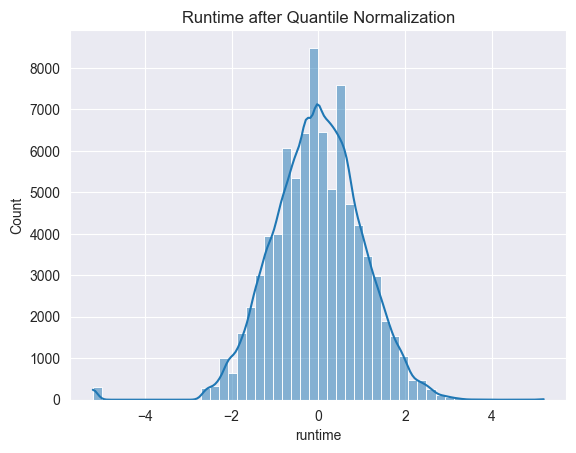

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['runtime'], bins=50, kde=True)
plt.title("Runtime after Quantile Normalization")
plt.show()

In [145]:
df.info()

df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84133 entries, 0 to 84132
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   movieId              84133 non-null  int64   
 1   runtime              84133 non-null  float64 
 2   overview             82275 non-null  object  
 3   title                84133 non-null  object  
 4   genres               82604 non-null  object  
 5   if_blockbuster       84133 non-null  int32   
 6   highly_watched       84133 non-null  int32   
 7   release_year         84133 non-null  float64 
 8   decade               83004 non-null  category
 9   highly_rated         84133 non-null  int64   
 10  engagement_score     84133 non-null  float64 
 11  semantic_keywords    84133 non-null  object  
 12  cast_importance      84133 non-null  float64 
 13  top_cast_members     84133 non-null  object  
 14  director_score       84133 non-null  float64 
 15  top_directors      

,movieId,runtime,overview,title,genres,if_blockbuster,highly_watched,release_year,decade,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,has_keywords,has_cast,has_director,lemmatized_keywords,overview_spacy,tokens_combined,cleaned_title
0,1,-0.858910,"Led by Woody, Andy's toys live happily in his ...",Toy Story,"Animation, Adventure, Family, Comedy",1,1,1995.0,"[1990, 2000)",1,3.103444,"[computer animation, walkie talkie, elementary...",2.025482,"[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...",1.997245,[John Lasseter],1,1,1,"[computer animation, walkie talkie, elementary...","[buzz, andy, scene, room, place, duo, circumst...","[andy, place, room, computer animation, elemen...","[toy, story]"
1,2,0.621099,When siblings Judy and Peter discover an encha...,Jumanji,"Adventure, Fantasy, Family",1,1,1995.0,"[1990, 2000)",1,2.211625,"[based on young adult novel, disappearance, di...",2.002399,"[Robin Williams, Kirsten Dunst, Bonnie Hunt, P...",1.904255,[Joe Johnston],1,1,1,"[based young adult novel, disappearance, dice,...","[enchanted, room, judy, peter, board, adult, d...","[enchanted, room, based young adult novel, jud...",[jumanji]
2,3,0.496390,A family wedding reignites the ancient feud be...,Grumpier Old Men,"Romance, Comedy",0,1,1995.0,"[1990, 2000)",0,1.348532,"[wedding, pranks, italian restaurant, yelling,...",1.117447,"[Kevin Pollak, Daryl Hannah, Jack Lemmon, Soph...",1.472204,[Howard Deutch],1,1,1,"[wedding, prank, italian restaurant, yelling, ...","[wedding, ancient, neighbor, time, italian, fi...","[wedding, duringcreditsstinger, ancient, neigh...","[old, men]"
3,4,1.471555,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,"Comedy, Drama, Romance",0,1,1995.0,"[1990, 2000)",0,1.136677,"[forget, let, friends, based on novel or book,...",1.481019,"[Dennis Haysbert, Angela Bassett, Mykelti Will...",0.861536,[Forest Whitaker],1,1,1,"[forget, let, friend, based novel book, interr...","[robin, breath, lover, string, vannah, glo, we...","[breath, lover, good, elusive, robin, interrac...",[_UNKNOWN_]
4,5,0.721714,Just when George Banks has recovered from his ...,Father of the Bride Part II,"Comedy, Family",0,1,1995.0,"[1990, 2000)",0,1.470989,"[baby, pregnancy, gynecologist, remake, normal...",1.896445,"[Steve Martin, BD Wong, Martin Short, Diane Ke...",1.355849,[Charles Shyer],1,1,1,"[baby, pregnancy, gynecologist, remake, normal...","[plan, kid, wedding, arrival, daughter, news, ...","[kid, wedding, baby, pregnancy, arrival, pregn...","[father, bride, part, ii]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,0.320290,After a chaotic night of rioting in a marginal...,La Haine,Drama,0,1,1995.0,"[1990, 2000)",1,1.923948,"[day in a life, breakdance, male friendship, d...",1.107756,"[Vincent Cassel, Saïd Taghmaoui]",1.292021,[Mathieu Kassovitz],1,1,1,"[day life, breakdance, male friendship, doesnt...","[health, night, rioting, unoccupied, suburb, h...","[male friendship, doesnt, health, paris, drama...",[la]
96,98,0.673702,"A dark, hip, urban story of a barren and anony...",Shopping,"Action, Adventure, Drama, Science Fiction, Thr...",0,0,1994.0,"[1990, 2000)",0,0.463934,"[shopping mall, future, paying, rivalry, one, ...",1.459025,"[Jude Law, Sean Bean, Jonathan Pryce, Ralph In...",2.075617,[Paul W.S. Anderson],1,1,1,"[shopping mall, future, paying, rivalry, one, ...","[shopping, story, arrive, urban, exciting, fie...","[shopping, story, one, arrive, vandalism, urba...",[shopping]
97,99,0.721714,A documentary crew from the BBC arrives in L.A...,Heidi Fleiss: Hollywood Madam,Documentary,0,0,1995.0,"[1990, 2000)",0,-0.281158,"[prostitution, whore, narration, based on true...",-0.361217,[Corinne Bohrer],0.072925,[Nick Broomfield],1,1,1,"[prostitution, whore, narration, based true st...","[arrest, time, intent, brothel, elapse, bbc, h...","[narration, arrest, time, intent, brothel, bbc...","[heidi, 

# Enkodowanie wartosci z kategoriami

In [148]:
df['genre_list'] = df['genres'].str.split(', ')
df = df.drop(columns='genres')
df['genre_list'] = df['genre_list'].fillna('').apply(lambda x: [] if x == '' else x)

# df = encode_using_mlb(df, 'genre_list')

all_genres = sorted(set(g for sublist in df['genre_list'] for g in sublist if g))
genre_to_idx = {g: i for i, g in enumerate(all_genres)}
genre_to_idx['_UNKNOWN_'] = len(genre_to_idx)

df['genre_ids'] = df['genre_list'].apply(
    lambda genres: [genre_to_idx.get(g, genre_to_idx['_UNKNOWN_']) for g in genres] if genres else [genre_to_idx['_UNKNOWN_']]
)

df = df.drop(columns='genre_list')

In [149]:
df = pd.get_dummies(df, columns=['decade'], prefix='decade')

In [150]:
print(df.head())

   movieId   runtime                                           overview  \
0        1 -0.858910  Led by Woody, Andy's toys live happily in his ...   
1        2  0.621099  When siblings Judy and Peter discover an encha...   
2        3  0.496390  A family wedding reignites the ancient feud be...   
3        4  1.471555  Cheated on, mistreated and stepped on, the wom...   
4        5  0.721714  Just when George Banks has recovered from his ...   

                         title  if_blockbuster  highly_watched  release_year  \
0                    Toy Story               1               1        1995.0   
1                      Jumanji               1               1        1995.0   
2             Grumpier Old Men               0               1        1995.0   
3            Waiting to Exhale               0               1        1995.0   
4  Father of the Bride Part II               0               1        1995.0   

   highly_rated  engagement_score  \
0             1          3.1034

# Enkodowanie wartości tekstowych

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84133 entries, 0 to 84132
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movieId              84133 non-null  int64  
 1   runtime              84133 non-null  float64
 2   overview             82275 non-null  object 
 3   title                84133 non-null  object 
 4   if_blockbuster       84133 non-null  int32  
 5   highly_watched       84133 non-null  int32  
 6   release_year         84133 non-null  float64
 7   highly_rated         84133 non-null  int64  
 8   engagement_score     84133 non-null  float64
 9   semantic_keywords    84133 non-null  object 
 10  cast_importance      84133 non-null  float64
 11  top_cast_members     84133 non-null  object 
 12  director_score       84133 non-null  float64
 13  top_directors        84133 non-null  object 
 14  has_keywords         84133 non-null  int64  
 15  has_cast             84133 non-null 

In [152]:
from collections import Counter

TOP_N = 10000 # WE SETUP HOW MANY FEATURES MATTERS (INSTEAD OF TF-IDF)

all_tokens = [token for sublist in df["tokens_combined"] for token in sublist]
token_counts = Counter(all_tokens)
common_tokens = set([token for token, _ in token_counts.most_common(TOP_N)])

common_tokens.add("_UNKNOWN_")
df["filtered_tokens"] = df["tokens_combined"].apply(
    lambda tokens: [t for t in tokens if t in common_tokens] if isinstance(tokens, list) else ["_UNKNOWN_"]
)

In [153]:
df['cleaned_title'] = df['cleaned_title'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

In [154]:
df['text_tokens'] = df.apply(
    lambda row: row['filtered_tokens'] + row['cleaned_title'], axis=1
)

assert df['text_tokens'].apply(lambda x: len(x) > 0).all(), "PUSTE TOKENY!"

In [155]:
print(f"_UNKNOWN_' in text_tokens: {(df['text_tokens'].apply(lambda x: '_UNKNOWN_' in x).mean() * 100):.2f}%")

_UNKNOWN_' in text_tokens: 17.40%


In [156]:
from gensim.models import Word2Vec

sentences = df["text_tokens"].tolist()
sentences = [s for s in sentences if s]
sentences.append(["_UNKNOWN_"])

own_model = Word2Vec(
    sentences=sentences,
    vector_size=300,
    window=5,
    min_count=1,
    workers=4,
    sg=1
)

# TOKENIZING AND CREATING VECTORS FOR LEMMATIZED_KEYWORDS

def average_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else model.wv["_UNKNOWN_"]

df["text_embedded"] = df["text_tokens"].apply(lambda tokens: average_vector(tokens, own_model))

In [158]:
from sklearn.metrics.pairwise import cosine_similarity

def show_similar_movies(df, movie_id, top_n=10):
    from sklearn.metrics.pairwise import cosine_similarity
    import numpy as np

    if 'text_embedded' not in df.columns:
        raise ValueError("Brakuje kolumny 'text_embedded'.")

    df['movieId'] = pd.to_numeric(df['movieId'], errors='coerce')

    row = df[df['movieId'] == movie_id]
    if row.empty:
        raise ValueError(f"Nie znaleziono filmu o movieId: {movie_id}")

    vec = row['text_embedded'].values[0]
    if isinstance(vec, list):
        vec = np.array(vec)
    vec = vec.reshape(1, -1)

    all_vecs = np.stack(df['text_embedded'].values)
    similarities = cosine_similarity(vec, all_vecs)[0]

    df['similarity'] = similarities
    title = row['title'].values[0]

    print(f"Film testowy: {title} (movieId: {movie_id})\n")
    print("Top podobnych filmów:")

    similar = df[df['movieId'] != movie_id].sort_values('similarity', ascending=False)
    print(similar[['title', 'similarity']].head(top_n).to_string(index=False))


In [159]:
df.head(10)

,movieId,runtime,overview,title,if_blockbuster,highly_watched,release_year,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,has_keywords,has_cast,has_director,lemmatized_keywords,overview_spacy,tokens_combined,cleaned_title,genre_ids,"decade_[1890, 1900)","decade_[1900, 1910)","decade_[1910, 1920)","decade_[1920, 1930)","decade_[1930, 1940)","decade_[1940, 1950)","decade_[1950, 1960)","decade_[1960, 1970)","decade_[1970, 1980)","decade_[1980, 1990)","decade_[1990, 2000)","decade_[2000, 2010)","decade_[2010, 2020)","decade_[2020, 2030)",filtered_tokens,text_tokens,text_embedded
0,1,-0.858910,"Led by Woody, Andy's toys live happily in his ...",Toy Story,1,1,1995.0,1,3.103444,"[computer animation, walkie talkie, elementary...",2.025482,"[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...",1.997245,[John Lasseter],1,1,1,"[computer animation, walkie talkie, elementary...","[buzz, andy, scene, room, place, duo, circumst...","[andy, place, room, computer animation, elemen...","[toy, story]","[2, 1, 7, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[andy, place, room, computer animation, elemen...","[andy, place, room, computer animation, elemen...","[0.06548511, 0.16055259, 0.020576902, -0.06513..."
1,2,0.621099,When siblings Judy and Peter discover an encha...,Jumanji,1,1,1995.0,1,2.211625,"[based on young adult novel, disappearance, di...",2.002399,"[Robin Williams, Kirsten Dunst, Bonnie Hunt, P...",1.904255,[Joe Johnston],1,1,1,"[based young adult novel, disappearance, dice,...","[enchanted, room, judy, peter, board, adult, d...","[enchanted, room, based young adult novel, jud...",[jumanji],"[1, 8, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[enchanted, room, based young adult novel, jud...","[enchanted, room, based young adult novel, jud...","[0.029812882, 0.17041773, -0.0033990666, -0.01..."
2,3,0.496390,A family wedding reignites the ancient feud be...,Grumpier Old Men,0,1,1995.0,0,1.348532,"[wedding, pranks, italian restaurant, yelling,...",1.117447,"[Kevin Pollak, Daryl Hannah, Jack Lemmon, Soph...",1.472204,[Howard Deutch],1,1,1,"[wedding, prank, italian restaurant, yelling, ...","[wedding, ancient, neighbor, time, italian, fi...","[wedding, duringcreditsstinger, ancient, neigh...","[old, men]","[13, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[wedding, duringcreditsstinger, ancient, neigh...","[wedding, duringcreditsstinger, ancient, neigh...","[0.06587183, 0.14877164, 0.0310863, -0.0848565..."
3,4,1.471555,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,0,1,1995.0,0,1.136677,"[forget, let, friends, based on novel or book,...",1.481019,"[Dennis Haysbert, Angela Bassett, Mykelti Will...",0.861536,[Forest Whitaker],1,1,1,"[forget, let, friend, based novel book, interr...","[robin, breath, lover, string, vannah, glo, we...","[breath, lover, good, elusive, robin, interrac...",[_UNKNOWN_],"[3, 6, 13]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[breath, lover, good, elusive, robin, interrac...","[breath, lover, good, elusive, robin, interrac...","[0.020277813, 0.116846524, -0.031359904, -0.06..."
4,5,0.721714,Just when George Banks has recovered from his ...,Father of the Bride Part II,0,1,1995.0,0,1.470989,"[baby, pregnancy, gynecologist, remake, normal...",1.896445,"[Steve Martin, BD Wong, Martin Short, Diane Ke...",1.355849,[Charles Shyer],1,1,1,"[baby, pregnancy, gynecologist, remake, normal...","[plan, kid, wedding, arrival, daughter, news, ...","[kid, wedding, baby, pregnancy, arrival, pregn...","[father, bride, part, ii]","[3, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[kid, wedding, baby, pregnancy, arrival, pregn...","[kid, wedding, baby, pregnancy, arrival, pregn...","[0.002441175, 0.1875583, 0.0040396256, -0.0971..."
5,6,2.38634

In [160]:
show_similar_movies(df, movie_id=296, top_n=5)
df.drop(columns=["similarity"], inplace=True, errors="ignore")

🎯 Film testowy: Pulp Fiction (movieId: 296)

🔍 Top podobnych filmów:
               title  similarity
           Ambulance    0.960881
            The Heat    0.957771
       Most Unwanted    0.955756
Harry in Your Pocket    0.954081
               Super    0.953928


In [161]:
# def get_average_w2v_embedding(title_tokens, model):
#     vectors = [model.wv[word] for word in title_tokens if word in model.wv]
#     return np.mean(vectors, axis=0) if vectors else model.wv["_UNKNOWN_"]
#
# df['title_embedded'] = df['cleaned_title'].apply(lambda x: get_average_w2v_embedding(x, own_model))
#
# print(df[['title', 'title_embedded']].head(10))

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84133 entries, 0 to 84132
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movieId              84133 non-null  int64  
 1   runtime              84133 non-null  float64
 2   overview             82275 non-null  object 
 3   title                84133 non-null  object 
 4   if_blockbuster       84133 non-null  int32  
 5   highly_watched       84133 non-null  int32  
 6   release_year         84133 non-null  float64
 7   highly_rated         84133 non-null  int64  
 8   engagement_score     84133 non-null  float64
 9   semantic_keywords    84133 non-null  object 
 10  cast_importance      84133 non-null  float64
 11  top_cast_members     84133 non-null  object 
 12  director_score       84133 non-null  float64
 13  top_directors        84133 non-null  object 
 14  has_keywords         84133 non-null  int64  
 15  has_cast             84133 non-null 

In [163]:
# FALLBACK FOR VECTORS THAT EQUALS 0 (NOT NEEDED WHEN WE USE FLAG _UNKNOWN_)

# import numpy as np
#
# def get_fallback_vector(column):
#     vectors = np.stack(column[column.apply(lambda v: np.any(v))].values)
#     return np.mean(vectors, axis=0)
#
# fallback_title = get_fallback_vector(df['title_embedded'])
# fallback_combined = get_fallback_vector(df['keywords_embedded'])
#
# df['title_embedded'] = df['title_embedded'].apply(
#     lambda vec: vec if np.any(vec) else fallback_title
# )
#
# df['keywords_embedded'] = df['keywords_embedded'].apply(
#     lambda vec: vec if np.any(vec) else fallback_combined
# )

In [164]:
actors = ["_UNKNOWN_"] + sorted(set(df['top_cast_members'].explode()))
directors = ["_UNKNOWN_"] + sorted(set(df['top_directors'].explode()))

actor_to_idx = {actor: idx for idx, actor in enumerate(actors)}
director_to_idx = {director: idx for idx, director in enumerate(directors)}

def encode_members(members, member_to_idx):
    return [member_to_idx.get(member, 0) for member in members]  # 0 = _UNKNOWN_

df['actor_ids'] = df['top_cast_members'].apply(lambda x: encode_members(x, actor_to_idx))
df['director_ids'] = df['top_directors'].apply(lambda x: encode_members(x, director_to_idx))

print(df[['title', 'actor_ids', 'director_ids']].head(10))

# actors = df['top_cast_members'].explode().unique()
# directors = df['top_directors'].explode().unique()
#
# actor_to_idx = {actor: idx for idx, actor in enumerate(actors)}
# director_to_idx = {director: idx for idx, director in enumerate(directors)}
#
# def encode_members(members, member_to_idx):
#     return [member_to_idx.get(member, -1) for member in members]
#
# df['actor_ids'] = df['top_cast_members'].apply(lambda x: encode_members(x, actor_to_idx))
# df['director_ids'] = df['top_directors'].apply(lambda x: encode_members(x, director_to_idx))
#
# # self.actor_embedding = nn.Embedding(num_actors, 50)
# # embedded = self.actor_embedding(actor_ids)
#
# print(df[['title', 'actor_ids', 'director_ids']].head(10))

                         title                         actor_ids director_ids
0                    Toy Story  [10748, 10645, 2688, 11192, 702]       [2399]
1                      Jumanji          [9365, 6213, 1282, 8457]       [2307]
2             Grumpier Old Men  [6110, 2354, 4464, 10134, 11212]       [1898]
3            Waiting to Exhale           [2537, 583, 7940, 6713]       [1439]
4  Father of the Bride Part II    [10259, 958, 7253, 2590, 6128]        [734]
5                         Heat     [9260, 167, 10964, 877, 7940]       [3319]
6                      Sabrina    [4000, 3846, 2259, 5646, 7840]       [4672]
7                 Tom and Huck          [7089, 1307, 7627, 2151]       [3805]
8                 Sudden Death                [4852, 8813, 2726]       [3809]
9                    GoldenEye   [8765, 5615, 3254, 9822, 10507]       [3168]


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84133 entries, 0 to 84132
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movieId              84133 non-null  int64  
 1   runtime              84133 non-null  float64
 2   overview             82275 non-null  object 
 3   title                84133 non-null  object 
 4   if_blockbuster       84133 non-null  int32  
 5   highly_watched       84133 non-null  int32  
 6   release_year         84133 non-null  float64
 7   highly_rated         84133 non-null  int64  
 8   engagement_score     84133 non-null  float64
 9   semantic_keywords    84133 non-null  object 
 10  cast_importance      84133 non-null  float64
 11  top_cast_members     84133 non-null  object 
 12  director_score       84133 non-null  float64
 13  top_directors        84133 non-null  object 
 14  has_keywords         84133 non-null  int64  
 15  has_cast             84133 non-null 

In [166]:
df.head(87000)

,movieId,runtime,overview,title,if_blockbuster,highly_watched,release_year,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,has_keywords,has_cast,has_director,lemmatized_keywords,overview_spacy,tokens_combined,cleaned_title,genre_ids,"decade_[1890, 1900)","decade_[1900, 1910)","decade_[1910, 1920)","decade_[1920, 1930)","decade_[1930, 1940)","decade_[1940, 1950)","decade_[1950, 1960)","decade_[1960, 1970)","decade_[1970, 1980)","decade_[1980, 1990)","decade_[1990, 2000)","decade_[2000, 2010)","decade_[2010, 2020)","decade_[2020, 2030)",filtered_tokens,text_tokens,text_embedded,actor_ids,director_ids
0,1,-0.858910,"Led by Woody, Andy's toys live happily in his ...",Toy Story,1,1,1995.0,1,3.103444,"[computer animation, walkie talkie, elementary...",2.025482,"[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...",1.997245,[John Lasseter],1,1,1,"[computer animation, walkie talkie, elementary...","[buzz, andy, scene, room, place, duo, circumst...","[andy, place, room, computer animation, elemen...","[toy, story]","[2, 1, 7, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[andy, place, room, computer animation, elemen...","[andy, place, room, computer animation, elemen...","[0.06548511, 0.16055259, 0.020576902, -0.06513...","[10748, 10645, 2688, 11192, 702]",[2399]
1,2,0.621099,When siblings Judy and Peter discover an encha...,Jumanji,1,1,1995.0,1,2.211625,"[based on young adult novel, disappearance, di...",2.002399,"[Robin Williams, Kirsten Dunst, Bonnie Hunt, P...",1.904255,[Joe Johnston],1,1,1,"[based young adult novel, disappearance, dice,...","[enchanted, room, judy, peter, board, adult, d...","[enchanted, room, based young adult novel, jud...",[jumanji],"[1, 8, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[enchanted, room, based young adult novel, jud...","[enchanted, room, based young adult novel, jud...","[0.029812882, 0.17041773, -0.0033990666, -0.01...","[9365, 6213, 1282, 8457]",[2307]
2,3,0.496390,A family wedding reignites the ancient feud be...,Grumpier Old Men,0,1,1995.0,0,1.348532,"[wedding, pranks, italian restaurant, yelling,...",1.117447,"[Kevin Pollak, Daryl Hannah, Jack Lemmon, Soph...",1.472204,[Howard Deutch],1,1,1,"[wedding, prank, italian restaurant, yelling, ...","[wedding, ancient, neighbor, time, italian, fi...","[wedding, duringcreditsstinger, ancient, neigh...","[old, men]","[13, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[wedding, duringcreditsstinger, ancient, neigh...","[wedding, duringcreditsstinger, ancient, neigh...","[0.06587183, 0.14877164, 0.0310863, -0.0848565...","[6110, 2354, 4464, 10134, 11212]",[1898]
3,4,1.471555,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,0,1,1995.0,0,1.136677,"[forget, let, friends, based on novel or book,...",1.481019,"[Dennis Haysbert, Angela Bassett, Mykelti Will...",0.861536,[Forest Whitaker],1,1,1,"[forget, let, friend, based novel book, interr...","[robin, breath, lover, string, vannah, glo, we...","[breath, lover, good, elusive, robin, interrac...",[_UNKNOWN_],"[3, 6, 13]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[breath, lover, good, elusive, robin, interrac...","[breath, lover, good, elusive, robin, interrac...","[0.020277813, 0.116846524, -0.031359904, -0.06...","[2537, 583, 7940, 6713]",[1439]
4,5,0.721714,Just when George Banks has recovered from his ...,Father of the Bride Part II,0,1,1995.0,0,1.470989,"[baby, pregnancy, gynecologist, remake, normal...",1.896445,"[Steve Martin, BD Wong, Martin Short, Diane Ke...",1.355849,[Charles Shyer],1,1,1,"[baby, pregnancy, gynecologist, remake, normal...","[plan, kid, wedding, arrival, daughter, news, ...","[kid, wedding, baby, pregnancy, arrival, pregn...","[father, bride, part, ii]","[3, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False

In [167]:
count_result = count_zeros_and_empty(df)
print(count_result)

{'movieId': {'zeros': 0}, 'runtime': {'zeros': 0}, 'title': {'empty_strings': 0}, 'if_blockbuster': {'zeros': 81853}, 'highly_watched': {'zeros': 76565}, 'release_year': {'zeros': 0}, 'highly_rated': {'zeros': 75872}, 'engagement_score': {'zeros': 0}, 'cast_importance': {'zeros': 0}, 'director_score': {'zeros': 0}, 'has_keywords': {'zeros': 26693}, 'has_cast': {'zeros': 8769}, 'has_director': {'zeros': 8769}, 'decade_[1890, 1900)': {'zeros': 83923}, 'decade_[1900, 1910)': {'zeros': 83838}, 'decade_[1910, 1920)': {'zeros': 83756}, 'decade_[1920, 1930)': {'zeros': 83441}, 'decade_[1930, 1940)': {'zeros': 81880}, 'decade_[1940, 1950)': {'zeros': 81696}, 'decade_[1950, 1960)': {'zeros': 80908}, 'decade_[1960, 1970)': {'zeros': 80105}, 'decade_[1970, 1980)': {'zeros': 78653}, 'decade_[1980, 1990)': {'zeros': 78106}, 'decade_[1990, 2000)': {'zeros': 76375}, 'decade_[2000, 2010)': {'zeros': 69206}, 'decade_[2010, 2020)': {'zeros': 56828}, 'decade_[2020, 2030)': {'zeros': 76143}}


# Zapisanie pliku do PARQUET i finalne przygotowanie danych

In [168]:
movie = df.loc[df['title'] == 'Gladiator']
print(movie)

      movieId   runtime                                           overview  \
3479     3578  2.053336  In the year 180, the death of emperor Marcus A...   
7639     8132  0.496390  Tommy Riley has moved with his dad to Chicago ...   

          title  if_blockbuster  highly_watched  release_year  highly_rated  \
3479  Gladiator               1               1        2000.0             1   
7639  Gladiator               0               1        1992.0             1   

      engagement_score                                  semantic_keywords  \
3479          3.016979  [battlefield, senate, slavery, gladiator, hero...   
7639          1.586186  [chicago, illinois, riley, boxer, tournament, ...   

      cast_importance                                   top_cast_members  \
3479         2.338473  [Djimon Hounsou, Joaquin Phoenix, Russell Crow...   
7639         0.835907                  [Cuba Gooding Jr., Brian Dennehy]   

      director_score       top_directors  has_keywords  has_cast  

In [169]:
columns_to_drop = [
    'semantic_keywords',
    'lemmatized_keywords',
    'overview',
    'overview_spacy',
    'tokens_combined',
    'filtered_tokens',
    'title',
    'cleaned_title',
    'top_cast_members',
    'top_directors',
    'text_tokens',
    'release_year'
]

df = df.drop(columns=columns_to_drop)
print('Final shape:', df.shape)

Final shape: (84133, 29)


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84133 entries, 0 to 84132
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movieId              84133 non-null  int64  
 1   runtime              84133 non-null  float64
 2   if_blockbuster       84133 non-null  int32  
 3   highly_watched       84133 non-null  int32  
 4   highly_rated         84133 non-null  int64  
 5   engagement_score     84133 non-null  float64
 6   cast_importance      84133 non-null  float64
 7   director_score       84133 non-null  float64
 8   has_keywords         84133 non-null  int64  
 9   has_cast             84133 non-null  int64  
 10  has_director         84133 non-null  int64  
 11  genre_ids            84133 non-null  object 
 12  decade_[1890, 1900)  84133 non-null  bool   
 13  decade_[1900, 1910)  84133 non-null  bool   
 14  decade_[1910, 1920)  84133 non-null  bool   
 15  decade_[1920, 1930)  84133 non-null 

In [171]:
embedding_columns = ['text_embedded'] # 'title_embedded'

for col in embedding_columns:
    def process(x):
        if hasattr(x, 'detach'):
            x = x.detach().cpu().numpy()
        x = np.array(x, dtype=np.float32)
        if len(x.shape) > 1:
            x = x.mean(axis=0)
        return x

    df[col] = df[col].apply(process)

In [172]:
df.head(10)

,movieId,runtime,if_blockbuster,highly_watched,highly_rated,engagement_score,cast_importance,director_score,has_keywords,has_cast,has_director,genre_ids,"decade_[1890, 1900)","decade_[1900, 1910)","decade_[1910, 1920)","decade_[1920, 1930)","decade_[1930, 1940)","decade_[1940, 1950)","decade_[1950, 1960)","decade_[1960, 1970)","decade_[1970, 1980)","decade_[1980, 1990)","decade_[1990, 2000)","decade_[2000, 2010)","decade_[2010, 2020)","decade_[2020, 2030)",text_embedded,actor_ids,director_ids
0,1,-0.858910,1,1,1,3.103444,2.025482,1.997245,1,1,1,"[2, 1, 7, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.06548511, 0.16055259, 0.020576902, -0.06513...","[10748, 10645, 2688, 11192, 702]",[2399]
1,2,0.621099,1,1,1,2.211625,2.002399,1.904255,1,1,1,"[1, 8, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.029812882, 0.17041773, -0.0033990666, -0.01...","[9365, 6213, 1282, 8457]",[2307]
2,3,0.496390,0,1,0,1.348532,1.117447,1.472204,1,1,1,"[13, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.06587183, 0.14877164, 0.0310863, -0.0848565...","[6110, 2354, 4464, 10134, 11212]",[1898]
3,4,1.471555,0,1,0,1.136677,1.481019,0.861536,1,1,1,"[3, 6, 13]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.020277813, 0.116846524, -0.031359904, -0.06...","[2537, 583, 7940, 6713]",[1439]
4,5,0.721714,0,1,0,1.470989,1.896445,1.355849,1,1,1,"[3, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.002441175, 0.1875583, 0.0040396256, -0.0971...","[10259, 958, 7253, 2590, 6128]",[734]
5,6,2.386340,1,1,1,2.486119,2.247187,1.889913,1,1,1,"[0, 4, 6]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.022553295, 0.18167515, 0.0395088, -0.032058...","[9260, 167, 10964, 877, 7940]",[3319]
6,7,1.471555,0,1,0,1.482615,1.769926,2.032196,1,1,1,"[3, 13]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.046596635, 0.12682895, 0.045590896, -0.0684...","[4000, 3846, 2259, 5646, 7840]",[4672]
7,8,0.262686,0,0,0,0.971573,1.105120,1.510657,1,1,1,"[7, 0, 1, 6]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.04871614, 0.14990605, 0.03094247, -0.061937...","[7089, 1307, 7627, 2151]",[3805]
8,9,0.893908,0,1,0,1.477680,1.376494,1.727466,1,1,1,[0],False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.028727222, 0.13235219, 0.074877486, -0.0265...","[4852, 8813, 2726]",[3809]
9,10,1.550085,1,1,1,2.140093,1.856072,2.060043,1,1,1,"[1, 0, 16]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.053986713, 0.11176384, 0.09973958, 0.05415...","[8765, 5615, 3254, 9822, 10507]",[3168]


In [173]:
cols = df.columns.tolist()
cols.remove('movieId')
new_order = ['movieId'] + cols

df_final = df[new_order]

In [174]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84133 entries, 0 to 84132
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movieId              84133 non-null  int64  
 1   runtime              84133 non-null  float64
 2   if_blockbuster       84133 non-null  int32  
 3   highly_watched       84133 non-null  int32  
 4   highly_rated         84133 non-null  int64  
 5   engagement_score     84133 non-null  float64
 6   cast_importance      84133 non-null  float64
 7   director_score       84133 non-null  float64
 8   has_keywords         84133 non-null  int64  
 9   has_cast             84133 non-null  int64  
 10  has_director         84133 non-null  int64  
 11  genre_ids            84133 non-null  object 
 12  decade_[1890, 1900)  84133 non-null  bool   
 13  decade_[1900, 1910)  84133 non-null  bool   
 14  decade_[1910, 1920)  84133 non-null  bool   
 15  decade_[1920, 1930)  84133 non-null 

In [175]:
df_final.head(1000)

,movieId,runtime,if_blockbuster,highly_watched,highly_rated,engagement_score,cast_importance,director_score,has_keywords,has_cast,has_director,genre_ids,"decade_[1890, 1900)","decade_[1900, 1910)","decade_[1910, 1920)","decade_[1920, 1930)","decade_[1930, 1940)","decade_[1940, 1950)","decade_[1950, 1960)","decade_[1960, 1970)","decade_[1970, 1980)","decade_[1980, 1990)","decade_[1990, 2000)","decade_[2000, 2010)","decade_[2010, 2020)","decade_[2020, 2030)",text_embedded,actor_ids,director_ids
0,1,-0.858910,1,1,1,3.103444,2.025482,1.997245,1,1,1,"[2, 1, 7, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.06548511, 0.16055259, 0.020576902, -0.06513...","[10748, 10645, 2688, 11192, 702]",[2399]
1,2,0.621099,1,1,1,2.211625,2.002399,1.904255,1,1,1,"[1, 8, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.029812882, 0.17041773, -0.0033990666, -0.01...","[9365, 6213, 1282, 8457]",[2307]
2,3,0.496390,0,1,0,1.348532,1.117447,1.472204,1,1,1,"[13, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.06587183, 0.14877164, 0.0310863, -0.0848565...","[6110, 2354, 4464, 10134, 11212]",[1898]
3,4,1.471555,0,1,0,1.136677,1.481019,0.861536,1,1,1,"[3, 6, 13]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.020277813, 0.116846524, -0.031359904, -0.06...","[2537, 583, 7940, 6713]",[1439]
4,5,0.721714,0,1,0,1.470989,1.896445,1.355849,1,1,1,"[3, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.002441175, 0.1875583, 0.0040396256, -0.0971...","[10259, 958, 7253, 2590, 6128]",[734]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1018,0.981540,0,0,0,0.915849,0.541438,1.425011,1,1,1,"[7, 3, 4]",False,False,False,False,False,False,False,True,False,False,False,False,False,False,"[0.041953392, 0.078540504, 0.113962695, 0.0154...","[2478, 9375, 3007, 4054]",[4192]
996,1019,1.471555,1,1,1,1.645829,0.583840,1.675557,1,1,1,"[1, 6, 7, 14]",False,False,False,False,False,False,True,False,False,False,False,False,False,False,"[0.052426387, 0.1983594, 0.018864464, 0.136118...","[6210, 9288, 8684, 10518, 4630]",[4040]
997,1020,0.320290,1,1,1,1.736726,0.962141,2.002675,1,1,1,"[3, 1, 6]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.10546951, 0.10959744, 0.08543932, -0.027467...","[5290, 8989, 6957]",[2469]
998,1021,0.539431,0,0,0,1.299148,1.408693,0.776144,1,1,1,"[3, 7, 8]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.02687819, 0.17797615, -0.0064525744, -0.036...","[5525, 2325, 1952, 1069, 4801]",[5073]


In [176]:
df_final.to_parquet('Movies_clean_Vec_v4_25keywords.parquet', compression='brotli', index=False)

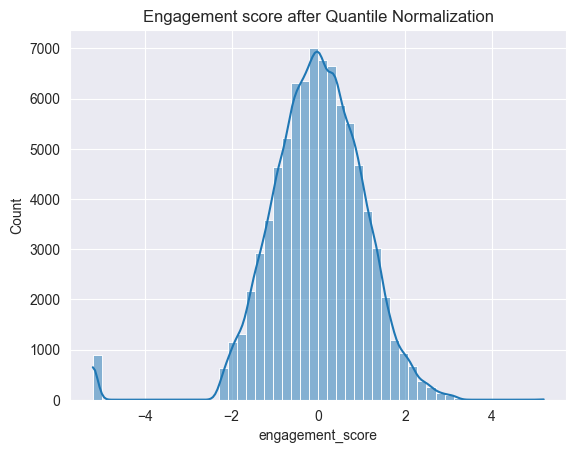

In [177]:
sns.histplot(df['engagement_score'], bins=50, kde=True)
plt.title("Engagement score after Quantile Normalization")
plt.show()